In [1]:
# 코로나 전후로 온라인 교육이 활성화

In [2]:
import numpy as np
import os
import seaborn as sns
import pandas as pd
np.random.seed(42)

In [3]:
covidedu=pd.read_excel('C:/Users/허욱/Documents/Project/정규교육기관_이러닝_콘텐츠_개발_및_이용현황_20220531203345_분석(전년_대비_증감_(증감률)).xlsx')

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Dataset 불러오기

In [5]:
edu_data=pd.read_csv('C:/Users/허욱/Documents/Project/students_adaptability_level_online_education.csv')

In [6]:
feature_names = edu_data.columns.tolist() # eo==대이터프레임 열을 목록으로 변환

In [7]:
feature_names # feature 변수들은 어떠한 것들이 있는지 확인

['Gender',
 'Age',
 'Education_Level',
 'Institution_Type',
 'IT_Student',
 'Location',
 'Load_shedding',
 'Financial_Condition',
 'Internet_Type',
 'Network_Type',
 'Class_Duration',
 'Self_Lms',
 'Device',
 'Adaptivity_Level']

In [8]:
edu_data # 데이터 확인 

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,03-06,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,01-03,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,01-03,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,01-03,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,01-03,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,03-06,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,01-03,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,01-03,No,Mobile,Low


Boy     663
Girl    542
Name: Gender, dtype: int64


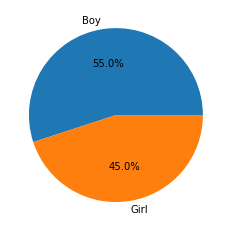

21-25    374
11-15    353
16-20    278
01-05     81
26-30     68
06-10     51
Name: Age, dtype: int64


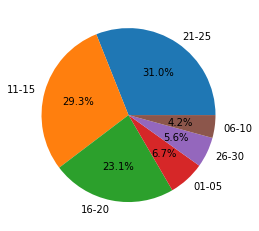

School        530
University    456
College       219
Name: Education_Level, dtype: int64


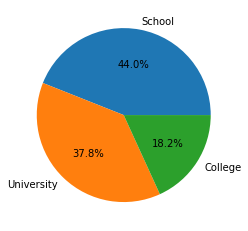

Non Government    823
Government        382
Name: Institution_Type, dtype: int64


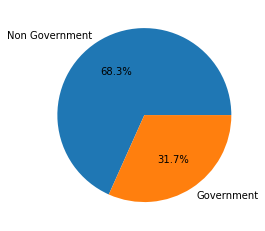

No     901
Yes    304
Name: IT_Student, dtype: int64


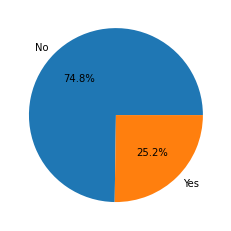

Yes    935
No     270
Name: Location, dtype: int64


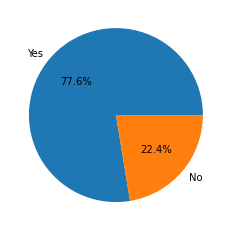

Low     1004
High     201
Name: Load_shedding, dtype: int64


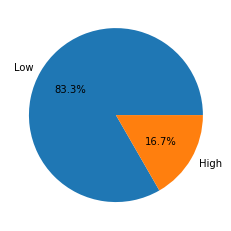

Mid     878
Poor    242
Rich     85
Name: Financial_Condition, dtype: int64


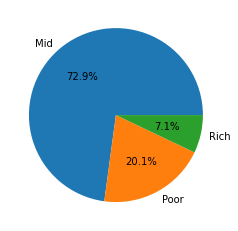

Mobile Data    695
Wifi           510
Name: Internet_Type, dtype: int64


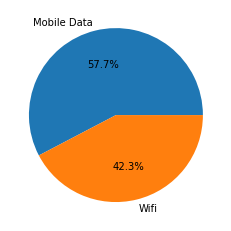

4G    775
3G    411
2G     19
Name: Network_Type, dtype: int64


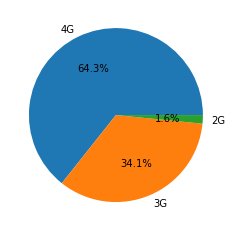

01-03    840
03-06    211
0        154
Name: Class_Duration, dtype: int64


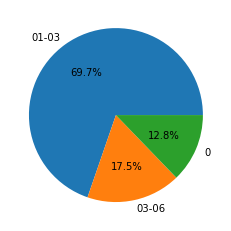

No     995
Yes    210
Name: Self_Lms, dtype: int64


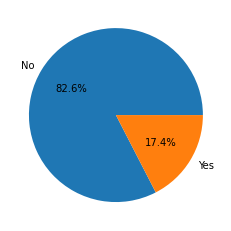

Mobile      1013
Computer     162
Tab           30
Name: Device, dtype: int64


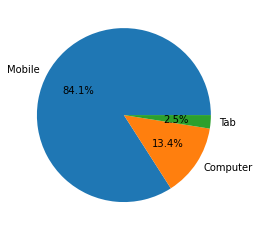

Moderate    625
Low         480
High        100
Name: Adaptivity_Level, dtype: int64


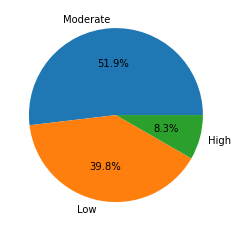

In [9]:
for i in edu_data.columns: # 변수별 데이터 시각화 
    plt.pie(edu_data[i].value_counts(),labels=edu_data[i].value_counts().index, autopct='%.1f%%')
    print(edu_data[i].value_counts()) 
    plt.show()

# 3. One-Hot-Encoding

In [10]:
# feature 변수들에 대한 One-Hot-Encoding

encoded_edu_data = pd.get_dummies(edu_data, columns = ['Gender', 'Age', 'Education_Level', 'Institution_Type', 'IT_Student',
       'Location', 'Load_shedding', 'Financial_Condition', 'Internet_Type',
       'Network_Type', 'Class_Duration', 'Self_Lms', 'Device'])

In [11]:
encoded_edu_data['Adaptivity_Level']=edu_data['Adaptivity_Level'].map(
{'Moderate':1,'Low':0,'High':2})

In [12]:
encoded_edu_data.describe()

,Adaptivity_Level,Gender_Boy,Gender_Girl,Age_01-05,Age_06-10,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Education_Level_College,...,Network_Type_3G,Network_Type_4G,Class_Duration_0,Class_Duration_01-03,Class_Duration_03-06,Self_Lms_No,Self_Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,...,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,0.684647,0.550207,0.449793,0.067220,0.042324,0.292946,0.230705,0.310373,0.056432,0.181743,...,0.341079,0.643154,0.127801,0.697095,0.175104,0.825726,0.174274,0.134440,0.840664,0.024896
std,0.618221,0.497679,0.497679,0.250506,0.201410,0.455303,0.421459,0.462839,0.230849,0.385792,...,0.474269,0.479268,0.334007,0.459705,0.380214,0.379502,0.379502,0.341266,0.366141,0.155874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
edu_data[feature_names[0:13]]

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,03-06,No,Tab
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,01-03,Yes,Mobile
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,01-03,No,Mobile
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,01-03,No,Mobile
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,01-03,No,Mobile
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,03-06,No,Mobile
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,01-03,No,Mobile
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,01-03,No,Mobile


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
X=encoded_edu_data.iloc[:,1:]
y=encoded_edu_data['Adaptivity_Level']
encoded_edu_data

,Adaptivity_Level,Gender_Boy,Gender_Girl,Age_01-05,Age_06-10,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Education_Level_College,...,Network_Type_3G,Network_Type_4G,Class_Duration_0,Class_Duration_01-03,Class_Duration_03-06,Self_Lms_No,Self_Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
2,1,0,1,0,0,0,1,0,0,1,...,0,1,0,1,0,1,0,0,1,0
3,1,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,0,0,1,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0,0,1,0,0,0,1,0,0,1,...,0,1,0,1,0,1,0,0,1,0
1201,1,0,1,0,0,0,1,0,0,1,...,0,1,0,0,1,1,0,0,1,0
1202,1,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
1203,0,0,1,0,0,0,1,0,0,1,...,0,1,0,1,0,1,0,0,1,0


In [16]:
encoded_feature_names = encoded_edu_data.columns.tolist()

In [17]:
tree_clf=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [18]:
tree_clf.feature_importances_

array([0.        , 0.07104345, 0.0217763 , 0.        , 0.05295265,
       0.07640056, 0.        , 0.02588883, 0.03810051, 0.0739379 ,
       0.        , 0.        , 0.0862494 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05536616,
       0.        , 0.15983237, 0.00652435, 0.        , 0.        ,
       0.        , 0.        , 0.33192752, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [19]:
Project_Root_DIR="."
Chapter_ID="decision_trees"
Images_Path=os.path.join(Project_Root_DIR,"Images",Chapter_ID)
os.makedirs(Images_Path,exist_ok=True)

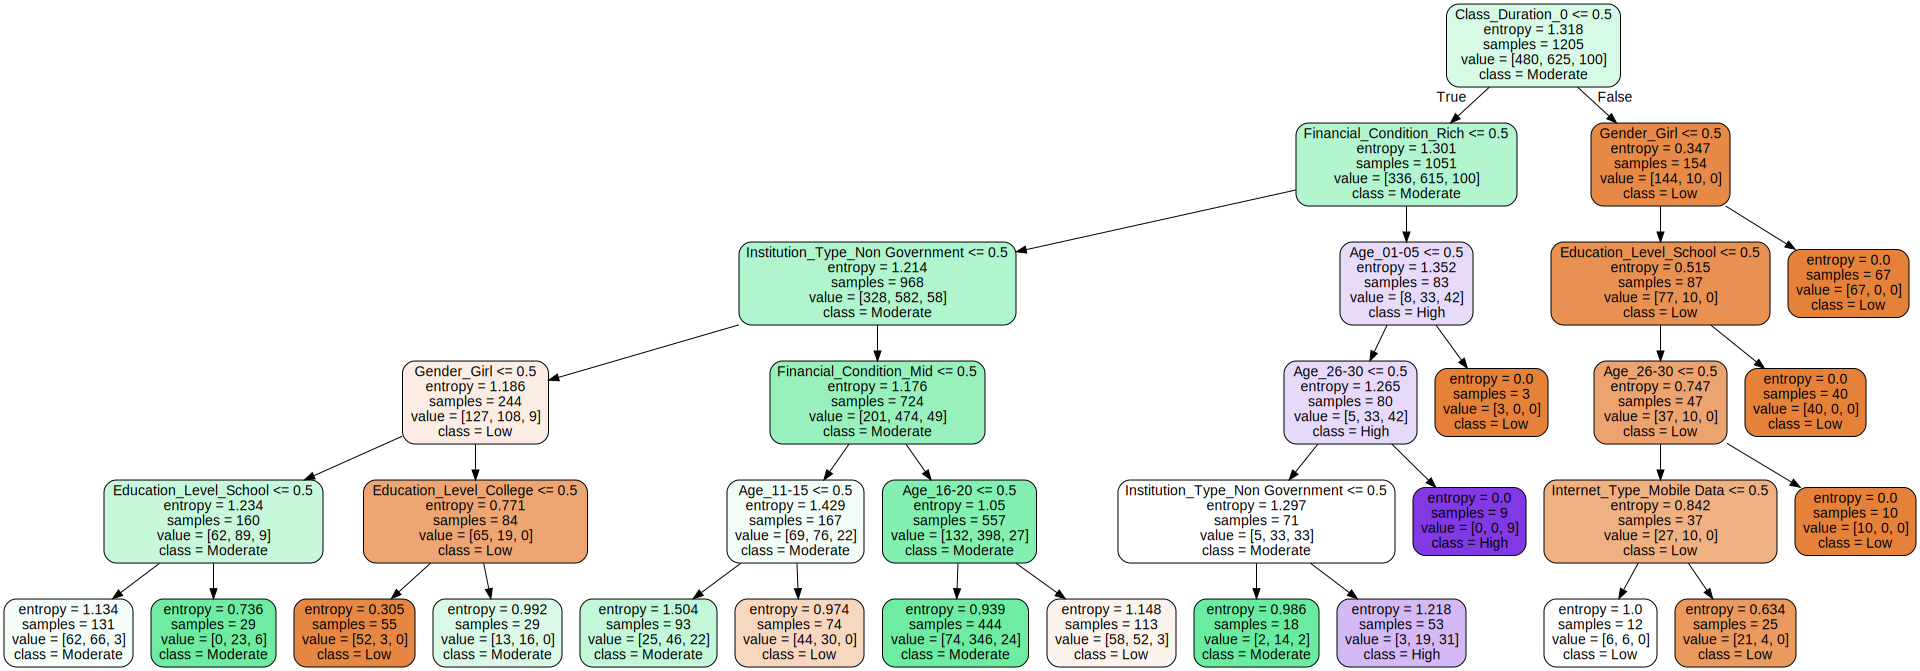

In [20]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(Images_Path,"Adaptivity.dot"),
        feature_names=encoded_feature_names[1:],
        class_names=['Low','Moderate','High'],
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(Images_Path, "Adaptivity.dot"))

In [21]:
tree_clf_tweaked=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
tree_clf_tweaked.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

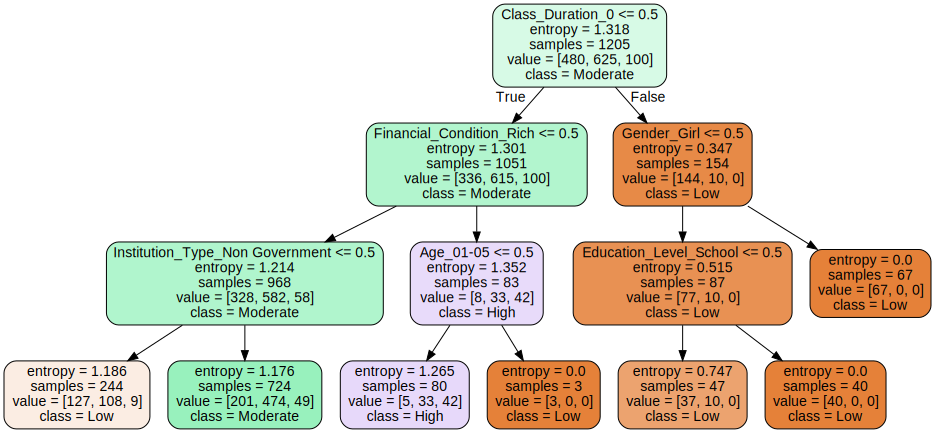

In [22]:
export_graphviz(
        tree_clf_tweaked,
        out_file=os.path.join(Images_Path,"Adaptivity.dot"),
        feature_names=encoded_feature_names[1:],
        class_names=['Low','Moderate','High'],
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(Images_Path, "Adaptivity.dot"))

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42) # test_size=0.2 

In [25]:
clf=DecisionTreeClassifier(max_depth=10,random_state=42)

In [26]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [27]:
pred_train=clf.predict(X_train)
accuracy_score(pred_train,y_train)

0.8817427385892116

In [28]:
pred_test=clf.predict(X_test)

In [29]:
pred_test # 241개(1025*0.2=241개) 의 test_set prediction 

array([1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0,
       0, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1],
      dtype=int64)

In [30]:
y_test

101     1
946     1
306     1
109     2
1061    1
       ..
908     1
1135    1
894     0
866     0
1006    1
Name: Adaptivity_Level, Length: 241, dtype: int64

In [31]:
print(f"정확도: {accuracy_score(pred_test,y_test)}")

정확도: 0.8589211618257261


In [32]:
for n in range(1,50):
    clf=DecisionTreeClassifier(max_depth=n,random_state=42)
    clf.fit(X_train,y_train)
    pred_train=clf.predict(X_train)
    pred_test=clf.predict(X_test)
    print(f"n={n}")
    print(f"Train Accuracy : {accuracy_score(pred_train,y_train)}")
    print(f"Test Accuracy : {accuracy_score(pred_test,y_test)}")
    print('==========================================')
    


n=1
Train Accuracy : 0.6390041493775933
Test Accuracy : 0.5933609958506224
n=2
Train Accuracy : 0.6441908713692946
Test Accuracy : 0.6099585062240664
n=3
Train Accuracy : 0.6556016597510373
Test Accuracy : 0.6556016597510373
n=4
Train Accuracy : 0.6929460580912863
Test Accuracy : 0.6639004149377593
n=5
Train Accuracy : 0.7230290456431535
Test Accuracy : 0.6970954356846473
n=6
Train Accuracy : 0.7614107883817427
Test Accuracy : 0.7427385892116183
n=7
Train Accuracy : 0.803941908713693
Test Accuracy : 0.7800829875518672
n=8
Train Accuracy : 0.8340248962655602
Test Accuracy : 0.8091286307053942
n=9
Train Accuracy : 0.8630705394190872
Test Accuracy : 0.7966804979253111
n=10
Train Accuracy : 0.8817427385892116
Test Accuracy : 0.8589211618257261
n=11
Train Accuracy : 0.8910788381742739
Test Accuracy : 0.8630705394190872
n=12
Train Accuracy : 0.8941908713692946
Test Accuracy : 0.8796680497925311
n=13
Train Accuracy : 0.9045643153526971
Test Accuracy : 0.8713692946058091
n=14
Train Accuracy : 

n=16 일 때 train 정확도 0.93, test 정확도 0.90 으로 최고성능을 보임

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# 혼동행렬 (모델의 성능을 평가할 대 사용되는 지표) 
# 예측값이 실제 관측값을 얼마나 정확히 예측했는지 보여주는 행렬
confusion_matrix(y_test,pred_test)


array([[ 95,   6,   2],
       [  8, 106,   1],
       [  0,   8,  15]], dtype=int64)

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
acc = []
for k in range(2, 50):
  score = cross_val_score(clf, X_train, y_train, cv=k)
  acc.append(score.mean())

In [38]:
acc

[0.8475103734439834,
 0.8817586089020466,
 0.8869294605809128,
 0.9004155872193437,
 0.9056094720496893,
 0.9035680282903387,
 0.9035296143250688,
 0.9035614014845582,
 0.9076997422680412,
 0.9066448180868243,
 0.9046553497942386,
 0.9066943866943866,
 0.9066496163682863,
 0.9098717948717948,
 0.9078039617486339,
 0.9108248562582928,
 0.9057380231384423,
 0.9087925696594429,
 0.9119260204081632,
 0.913871635610766,
 0.9087065154718431,
 0.9035499671766902,
 0.9067581300813009,
 0.9088798920377867,
 0.9107670423459898,
 0.9087301587301588,
 0.9120048019207683,
 0.9110578400639251,
 0.9130366161616161,
 0.9139568158168573,
 0.912970430107527,
 0.9151863462208291,
 0.9131773399014779,
 0.9078987150415723,
 0.9138968027856917,
 0.9128744128744128,
 0.9131983805668018,
 0.912905982905983,
 0.9140416666666666,
 0.9120272180982679,
 0.9128552606813475,
 0.9141005607133009,
 0.9148957103502557,
 0.913179413179413,
 0.915942028985507,
 0.9109929078014186,
 0.9128968253968255,
 0.912996777658431

In [39]:
max(acc) # k=46 일 때 정확도 최대

0.915942028985507

In [40]:
cvs=cross_val_score(clf, X_train, y_train, cv=10) # k=10 일 때 교차검증 

In [41]:
np.mean(cvs) # 교차검증 정확도 

0.9076997422680412

StandardScaling 은 진행하지 않는다. 데이터 스케일의 경우 분석 시 변수들의 숫자 스케일이 크게 달라지는 경우에 한하는데 이번 프로젝트는 숫자 스케일의 큰 차이가 없기 때문이다.

# KNN 알고리즘

K-nearest neighbors algorithm 으로 k개의 최근접이웃으로 분류하는 알고리즘

고차원일수록 거리측도의 유효성이 떨어져서 비효율적이다.

In [42]:
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
# 범주형 설명변수는 hamming 이 좋다고 한다.
# hamming , euclidean, manhattan 3개의 distance 비교해보기
knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors=5, metric = "euclidean")
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [44]:
y_knn_pred = knn_clf.predict(X_test)

In [45]:
accuracy_score(y_test, y_knn_pred)

0.7883817427385892

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors=5, metric = "euclidean")
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [47]:
y_knn_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_knn_pred)

0.7883817427385892

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors=5, metric = "hamming")
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='hamming')

In [49]:
y_knn_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_knn_pred)

0.7883817427385892

In [50]:
knn_clf.kneighbors(X_test) # 이 cell 에 대한 설명 필요할 듯    # 진찬님께 물어볼 내용

(array([[0.05714286, 0.11428571, 0.11428571, 0.11428571, 0.11428571],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.11428571, 0.11428571],
        ...,
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.05714286, 0.05714286, 0.05714286, 0.05714286]]),
 array([[244, 560, 242, 935, 238],
        [255, 707,  36, 771, 816],
        [954, 549, 781, 308, 385],
        ...,
        [ 12, 669,  19, 831, 228],
        [891, 497, 804, 792, 297],
        [195, 247, 394, 486, 267]], dtype=int64))

In [51]:
X_test

,Gender_Boy,Gender_Girl,Age_01-05,Age_06-10,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Education_Level_College,Education_Level_School,...,Network_Type_3G,Network_Type_4G,Class_Duration_0,Class_Duration_01-03,Class_Duration_03-06,Self_Lms_No,Self_Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
101,0,1,0,0,1,0,0,0,0,1,...,0,1,0,1,0,1,0,1,0,0
946,1,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
306,1,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1
109,0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1061,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,1,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
1135,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
894,0,1,0,1,0,0,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
866,1,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0


In [52]:
y_test

101     1
946     1
306     1
109     2
1061    1
       ..
908     1
1135    1
894     0
866     0
1006    1
Name: Adaptivity_Level, Length: 241, dtype: int64

In [53]:
y_knn_pred

array([1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 1, 0,
       0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1],
      dtype=int64)

In [54]:
# 최적의 k 값을 찾기 위해 k값에 따른 정확도 그래프 그리기 
acc = [] 
for k in range(1, 100):
  knn_clf = KNeighborsClassifier(weights='uniform', n_neighbors= k)
  knn_clf.fit(X_train, y_train)
  acc.append(knn_clf.score(X_test, y_test))

<AxesSubplot:>

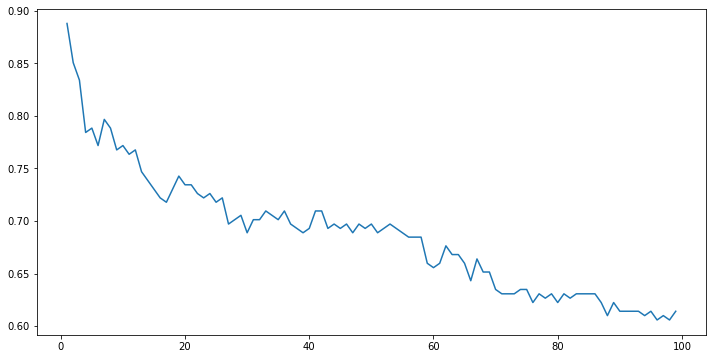

In [55]:
plt.figure(figsize=(12,6))
sns.lineplot(x = range(1,100), y = acc)

정확도가 떨어지는 이유에 대해서 생각해볼 필요가 있다.

In [56]:
edu_data

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,03-06,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,01-03,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,01-03,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,01-03,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,01-03,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,03-06,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,01-03,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,01-03,No,Mobile,Low


label encoding 을 통한 머신러닝 진행

Device 를 제외한 variable 들이 순서에 의미가 있거나 binary categorical variable이므로

Device 를 제외한 12개 변수를 label encoding 진행

In [57]:
sel_encoded_edu_data=pd.DataFrame(edu_data)
sel_encoded_edu_data['Gender']=edu_data['Gender'].map(
{'Boy':1,'Girl':0})
sel_encoded_edu_data['Age']=edu_data['Age'].map(
{'01-05':0,'06-10':1, '11-15':2, '16-20':3,'21-25':4, '26-30':5})
sel_encoded_edu_data['Education_Level']=edu_data['Education_Level'].map(
{'School':0,'University':1, 'College':2})
sel_encoded_edu_data['Institution_Type']=edu_data['Institution_Type'].map(
{'Government':0,'Non Government':1})
sel_encoded_edu_data['IT_Student']=edu_data['IT_Student'].map(
{'No':0,'Yes':1})
sel_encoded_edu_data['Location']=edu_data['Location'].map(
{'No':0,'Yes':1})
sel_encoded_edu_data['Load_shedding']=edu_data['Load_shedding'].map(
{'Low':0,'High':1})
sel_encoded_edu_data['Financial_Condition']=edu_data['Financial_Condition'].map(
{'Poor':0,'Mid':1, 'Rich':2})
sel_encoded_edu_data['Internet_Type']=edu_data['Internet_Type'].map(
{'Wifi':0,'Mobile Data':1})
sel_encoded_edu_data['Network_Type']=edu_data['Network_Type'].map(
{'2G':0,'3G':1, '4G':2})
sel_encoded_edu_data['Class_Duration']=edu_data['Class_Duration'].map(
{'0':0,'01-03':1, '03-06':2})
sel_encoded_edu_data['Self_Lms']=edu_data['Self_Lms'].map(
{'No':0,'Yes':1})
sel_encoded_edu_data['Device']=edu_data['Device'].map(
{'Tab':0,'Mobile':1, 'Computer':2})
sel_encoded_edu_data['Adaptivity_Level']=edu_data['Adaptivity_Level'].map(
{'Moderate':1,'Low':0,'High':2})

In [58]:
sel_encoded_edu_data

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level
0,1,4,1,1,0,1,0,1,0,2,2,0,0,1
1,0,4,1,1,0,1,1,1,1,2,1,1,1,1
2,0,3,2,0,0,1,0,1,0,2,1,0,1,1
3,0,2,0,1,0,1,0,1,1,2,1,0,1,1
4,0,3,0,1,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0,3,2,1,0,1,0,1,0,2,1,0,1,0
1201,0,3,2,1,0,0,1,1,0,2,2,0,1,1
1202,1,2,0,1,0,1,0,1,1,1,1,0,1,1
1203,0,3,2,1,0,0,0,1,0,2,1,0,1,0


<AxesSubplot:title={'center':'Person Correlation of Features'}>

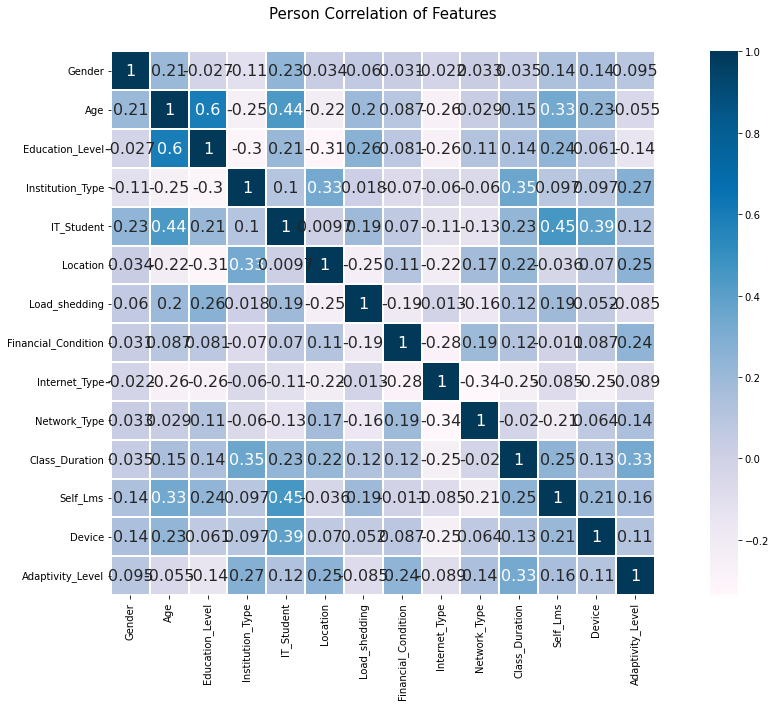

In [59]:
colormap = plt.cm.PuBu
plt.figure(figsize=(20, 10))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(sel_encoded_edu_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [60]:
import statsmodels.formula.api as smf

In [61]:
res = smf.ols(formula='Adaptivity_Level ~Gender + Age + Education_Level + Institution_Type + IT_Student + Location + Load_shedding + Financial_Condition + Internet_Type + Network_Type + Class_Duration + Self_Lms + Device', data=sel_encoded_edu_data).fit()

In [62]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       Adaptivity_Level   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     32.42
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           1.85e-69
Time:                        00:22:14   Log-Likelihood:                -947.29
No. Observations:                1205   AIC:                             1923.
Df Residuals:                    1191   BIC:                             1994.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.4194    

In [63]:
res2 = smf.ols(formula='Adaptivity_Level ~Gender + Education_Level + Institution_Type + Location + Financial_Condition + Internet_Type + Network_Type + Class_Duration + Self_Lms ', data=sel_encoded_edu_data).fit()

In [64]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:       Adaptivity_Level   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     46.59
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           3.69e-72
Time:                        00:22:14   Log-Likelihood:                -948.61
No. Observations:                1205   AIC:                             1917.
Df Residuals:                    1195   BIC:                             1968.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.4430    

In [65]:
sel_encoded_edu_data.describe()

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device,Adaptivity_Level
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,0.550207,2.843983,0.741909,0.682988,0.252282,0.775934,0.166805,0.869710,0.576763,1.627386,1.047303,0.174274,1.109544,0.684647
std,0.497679,1.257096,0.745269,0.465506,0.434503,0.417139,0.372956,0.504584,0.494277,0.515295,0.548559,0.379502,0.384003,0.618221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000


In [66]:
X1=sel_encoded_edu_data.iloc[:,:13]
y1=sel_encoded_edu_data['Adaptivity_Level']
X1

,Gender,Age,Education_Level,Institution_Type,IT_Student,Location,Load_shedding,Financial_Condition,Internet_Type,Network_Type,Class_Duration,Self_Lms,Device
0,1,4,1,1,0,1,0,1,0,2,2,0,0
1,0,4,1,1,0,1,1,1,1,2,1,1,1
2,0,3,2,0,0,1,0,1,0,2,1,0,1
3,0,2,0,1,0,1,0,1,1,2,1,0,1
4,0,3,0,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0,3,2,1,0,1,0,1,0,2,1,0,1
1201,0,3,2,1,0,0,1,1,0,2,2,0,1
1202,1,2,0,1,0,1,0,1,1,1,1,0,1
1203,0,3,2,1,0,0,0,1,0,2,1,0,1


In [67]:
tree_clf1=DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42)
tree_clf1.fit(X1,y1)
X_train, X_test, y_train, y_test=train_test_split(X1,y1,test_size=0.2, random_state=42)

In [68]:
pred_test=tree_clf1.predict(X_test)

In [69]:
y_test

101     1
946     1
306     1
109     2
1061    1
       ..
908     1
1135    1
894     0
866     0
1006    1
Name: Adaptivity_Level, Length: 241, dtype: int64

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# 혼동행렬 (모델의 성능을 평가할 대 사용되는 지표) 
# 예측값이 실제 관측값을 얼마나 정확히 예측했는지 보여주는 행렬
confusion_matrix(y_test,pred_test)

array([[ 92,   9,   2],
       [  5, 110,   0],
       [  0,   9,  14]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

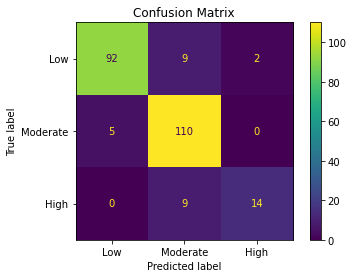

In [71]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


label=['Low', 'Moderate', 'High'] 
plot = plot_confusion_matrix(tree_clf1, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [72]:
accuracy_score(y_test,pred_test)

0.8962655601659751

In [73]:
feature_names[:13]

['Gender',
 'Age',
 'Education_Level',
 'Institution_Type',
 'IT_Student',
 'Location',
 'Load_shedding',
 'Financial_Condition',
 'Internet_Type',
 'Network_Type',
 'Class_Duration',
 'Self_Lms',
 'Device']

In [74]:
tree_clf1.feature_importances_

array([0.08572018, 0.10021661, 0.11579779, 0.04154858, 0.03020618,
       0.045142  , 0.05867591, 0.09540387, 0.05271626, 0.12147303,
       0.16479285, 0.04738124, 0.04092549])

In [75]:
Project_Root_DIR="."
Chapter_ID="decision_trees"
Images_Path=os.path.join(Project_Root_DIR,"Images",Chapter_ID)
os.makedirs(Images_Path,exist_ok=True)

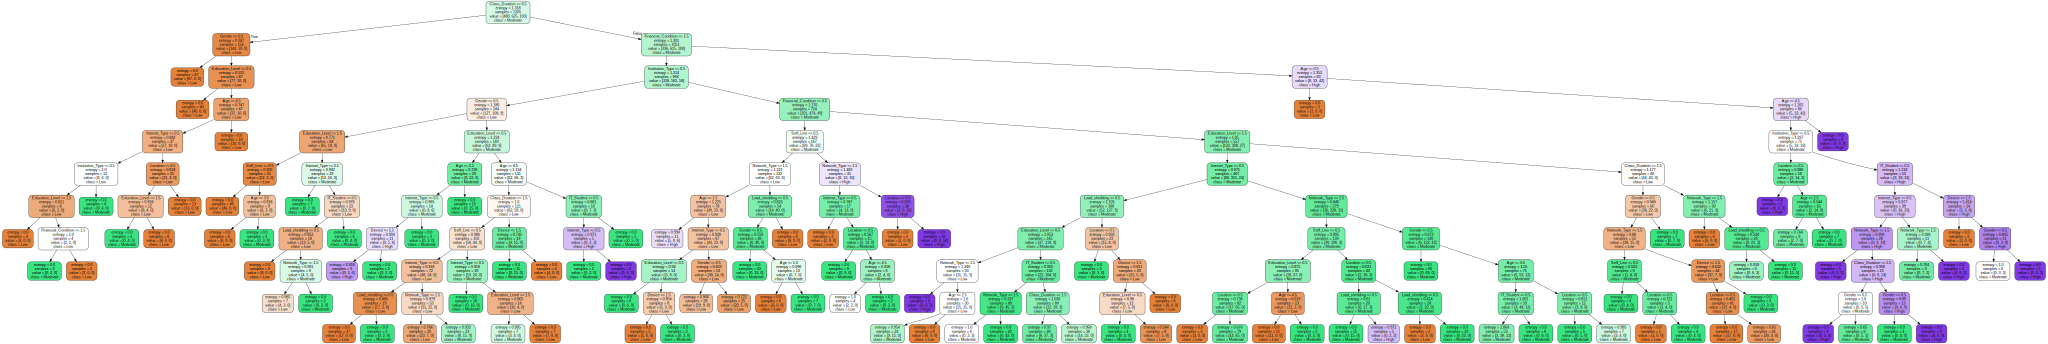

In [76]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf1,
        out_file=os.path.join(Images_Path,"Adaptivity1.dot"),
        feature_names=feature_names[:13],
        class_names=['Low','Moderate','High'],
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(Images_Path, "Adaptivity1.dot"))

In [77]:
tree_clf2=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
tree_clf2.fit(X1,y1)
X_train, X_test, y_train, y_test=train_test_split(X1,y1,test_size=0.2, random_state=42)

In [78]:
tree_clf2.feature_importances_

array([0.0277229 , 0.03531486, 0.03111564, 0.10835434, 0.        ,
       0.        , 0.        , 0.25920186, 0.        , 0.        ,
       0.5382904 , 0.        , 0.        ])

In [79]:
Project_Root_DIR="."
Chapter_ID="decision_trees"
Images_Path=os.path.join(Project_Root_DIR,"Images",Chapter_ID)
os.makedirs(Images_Path,exist_ok=True)

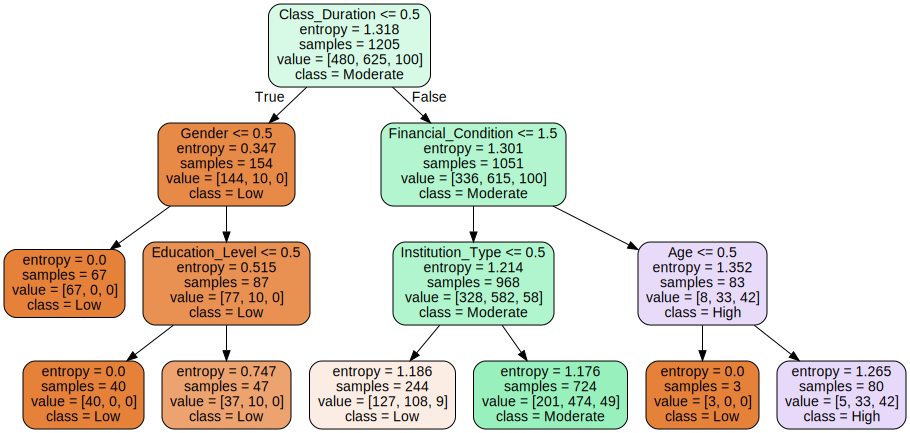

In [80]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf2,
        out_file=os.path.join(Images_Path,"Adaptivity2.dot"),
        feature_names=feature_names[:13],
        class_names=['Low','Moderate','High'],
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(Images_Path, "Adaptivity2.dot"))

In [81]:
tree_clf3=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=42)
tree_clf3.fit(X1,y1)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [82]:
tree_clf3.feature_importances_

array([0.03359476, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.31410215, 0.        , 0.        ,
       0.65230309, 0.        , 0.        ])

In [83]:
Project_Root_DIR="."
Chapter_ID="decision_trees"
Images_Path=os.path.join(Project_Root_DIR,"Images",Chapter_ID)
os.makedirs(Images_Path,exist_ok=True)

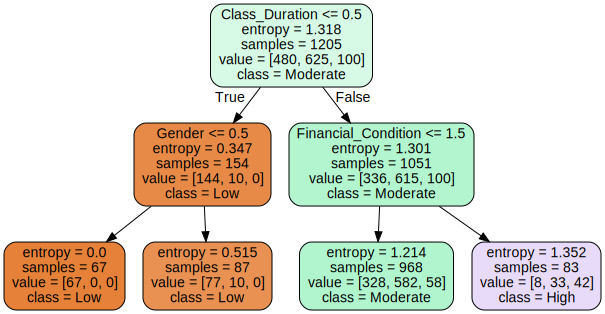

In [84]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf3,
        out_file=os.path.join(Images_Path,"Adaptivity2.dot"),
        feature_names=feature_names[:13],
        class_names=['Low','Moderate','High'],
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(Images_Path, "Adaptivity2.dot"))

In [85]:
X1=sel_encoded_edu_data.iloc[:,:13]
y1=sel_encoded_edu_data['Adaptivity_Level']

In [86]:
tree_clf1=DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42)
tree_clf1.fit(X1,y1)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [87]:
X_train, X_test, y_train, y_test=train_test_split(X1,y1,test_size=0.2, random_state=42)

In [88]:
pred_test=tree_clf1.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

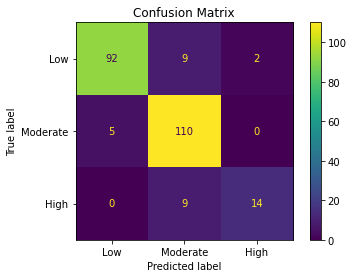

In [89]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


label=['Low', 'Moderate', 'High'] 
plot = plot_confusion_matrix(tree_clf1, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [90]:
train_acc= []
test_acc= []
for n in range(1,50):
    tree_clf1=DecisionTreeClassifier(criterion='entropy',max_depth=n,random_state=42)
    tree_clf1.fit(X_train,y_train)
    pred_train=tree_clf1.predict(X_train)
    pred_test=tree_clf1.predict(X_test)
    train_acc.append(accuracy_score(pred_train,y_train))
    test_acc.append(accuracy_score(pred_test,y_test))
    print(f"n={n}")
    print(f"Train Accuracy : {accuracy_score(pred_train,y_train)}")
    print(f"Test Accuracy : {accuracy_score(pred_test,y_test)}")
    print('==========================================')

n=1
Train Accuracy : 0.6390041493775933
Test Accuracy : 0.5933609958506224
n=2
Train Accuracy : 0.6441908713692946
Test Accuracy : 0.6099585062240664
n=3
Train Accuracy : 0.6556016597510373
Test Accuracy : 0.6556016597510373
n=4
Train Accuracy : 0.6794605809128631
Test Accuracy : 0.6721991701244814
n=5
Train Accuracy : 0.700207468879668
Test Accuracy : 0.6680497925311203
n=6
Train Accuracy : 0.7437759336099585
Test Accuracy : 0.7344398340248963
n=7
Train Accuracy : 0.803941908713693
Test Accuracy : 0.7634854771784232
n=8
Train Accuracy : 0.8319502074688797
Test Accuracy : 0.8174273858921162
n=9
Train Accuracy : 0.8537344398340249
Test Accuracy : 0.7966804979253111
n=10
Train Accuracy : 0.8827800829875518
Test Accuracy : 0.8381742738589212
n=11
Train Accuracy : 0.8910788381742739
Test Accuracy : 0.8506224066390041
n=12
Train Accuracy : 0.8983402489626556
Test Accuracy : 0.8506224066390041
n=13
Train Accuracy : 0.91701244813278
Test Accuracy : 0.8506224066390041
n=14
Train Accuracy : 0.9

Text(0, 0.5, 'acc')

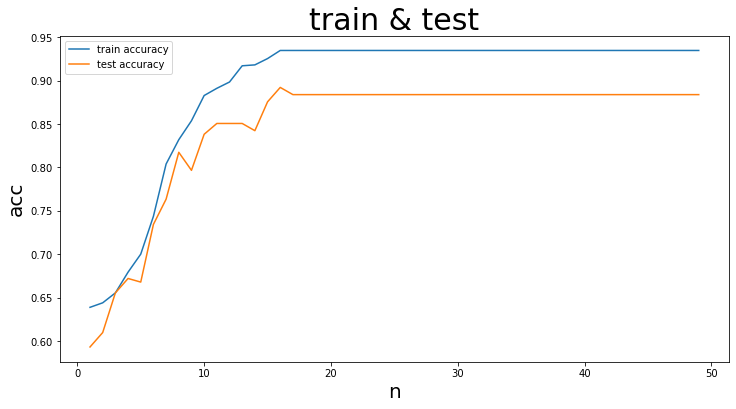

In [91]:
plt.figure(figsize=(12,6))
sns.lineplot(x = range(1,50), y = train_acc, label = "train accuracy")
sns.lineplot(x = range(1,50), y = test_acc, label = "test accuracy")
plt.title("train & test", fontsize = 30)
plt.xlabel("n",fontsize = 20)
plt.ylabel("acc", fontsize = 20)

In [92]:
from sklearn.metrics import roc_curve, auc

In [93]:
rclf = DecisionTreeClassifier(criterion='entropy',max_depth=12,random_state=42)
rclf.fit(X,y)
pred = rclf.predict(X)
rclf.predict_proba(X)

array([[0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       ...,
       [0.25531915, 0.74468085, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.67857143, 0.32142857, 0.        ]])

In [95]:
from sklearn.decomposition import PCA

In [96]:
pca = PCA(n_components = 2)

In [97]:
pca.fit(X)
PCscore=pca.transform(X)
len(PCscore)

1205

In [98]:
pca.components_

array([[ 0.14712869, -0.14712869, -0.06042517, -0.03030222, -0.2569336 ,
        -0.00825584,  0.32815353,  0.0277633 , -0.00105586, -0.36882035,
         0.36987621,  0.01308243, -0.01308243, -0.27475152,  0.27475152,
         0.03535696, -0.03535696,  0.09723029, -0.09723029,  0.0664284 ,
        -0.07130266,  0.00487427, -0.2211769 ,  0.2211769 , -0.00066261,
        -0.04429353,  0.04495614, -0.01099739, -0.169709  ,  0.18070639,
        -0.20082196,  0.20082196,  0.18287721, -0.21036967,  0.02749247],
       [ 0.15614916, -0.15614916, -0.0140629 ,  0.0093764 ,  0.17502363,
        -0.26285862,  0.12081749, -0.02829601, -0.22863337,  0.13668382,
         0.09194955, -0.20556904,  0.20556904, -0.19086934,  0.19086934,
        -0.01183725,  0.01183725,  0.06743102, -0.06743102, -0.1325135 ,
         0.15427353, -0.02176003,  0.308971  , -0.308971  ,  0.00069215,
         0.38999125, -0.39068339, -0.05754769,  0.05353738,  0.00401032,
        -0.15067676,  0.15067676,  0.01271473,  0.

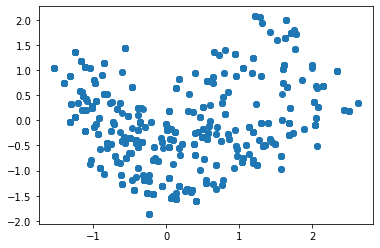

In [99]:
plt.scatter(PCscore[:,0],PCscore[:,1])
plt.show()

In [100]:
pca.explained_variance_

array([1.15303834, 0.74532184])

# SVM(support vector machine)

In [101]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets

In [102]:
X=sel_encoded_edu_data.iloc[:,:13]
y=sel_encoded_edu_data['Adaptivity_Level']

# K-means Clustering

In [114]:
import matplotlib as mpl

In [115]:

'''plt.figure(figsize=(9, 4))

plt.subplot(121)
plt.plot(X[y==0, 0], X[y==0, 10], "yo", label="Low")
plt.plot(X[y==1, 0], X[y==1, 10], "bs", label="Moderate")
plt.plot(X[y==2, 0], X[y==2, 10], "g^", label="High")
plt.xlabel("Age", fontsize=14)
plt.ylabel("Self_Lms", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 0], X[:, 10], c="k", marker=".")
plt.xlabel("Age", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()'''

'plt.figure(figsize=(9, 4))\n\nplt.subplot(121)\nplt.plot(X[y==0, 0], X[y==0, 10], "yo", label="Low")\nplt.plot(X[y==1, 0], X[y==1, 10], "bs", label="Moderate")\nplt.plot(X[y==2, 0], X[y==2, 10], "g^", label="High")\nplt.xlabel("Age", fontsize=14)\nplt.ylabel("Self_Lms", fontsize=14)\nplt.legend(fontsize=12)\n\nplt.subplot(122)\nplt.scatter(X[:, 0], X[:, 10], c="k", marker=".")\nplt.xlabel("Age", fontsize=14)\nplt.tick_params(labelleft=False)\n\nplt.show()'

In [116]:
X=sel_encoded_edu_data.iloc[:,:13]
y=sel_encoded_edu_data['Adaptivity_Level']

In [117]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\Uk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [118]:
from sklearn.cluster import KMeans

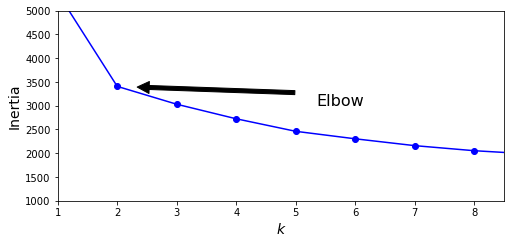

In [119]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 1000, 5000])
plt.show()

elbow point = 2 라는 결과 얻었고 기존 데이터셋은 3개의 target value 를 갖고 있었는데
2 개로 군집화를 시도해보는 과정을 진행하겠다.

In [120]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [121]:
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [122]:
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [123]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 1])

In [124]:
kmeans.cluster_centers_

array([[0.58197932, 3.75332349, 1.32053176, 0.58050222, 0.40915805,
        0.66912851, 0.25110783, 0.90398818, 0.44313146, 1.67060561,
        1.15361891, 0.30576071, 1.17577548],
       [0.5094697 , 1.6780303 , 0.        , 0.81439394, 0.05113636,
        0.91287879, 0.05871212, 0.82575758, 0.74810606, 1.5719697 ,
        0.91098485, 0.00568182, 1.02462121]])

In [125]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

3405.8830093773777

In [126]:
kmeans.labels_.sum() # 1이 528개, 0이 667 개 임을 확인

528

In [127]:
X=X=sel_encoded_edu_data.iloc[:,:13]
y=kmeans.labels_

In [128]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [129]:
newtree_clf=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=42)
newtree_clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

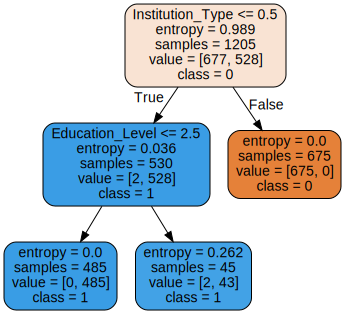

In [130]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        newtree_clf,
        out_file=os.path.join(Images_Path,"Clustertree_Adaptivity.dot"),
        feature_names=feature_names[1:],
        class_names=['0','1'],
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(Images_Path, "Clustertree_Adaptivity.dot"))

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [132]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
newtree_clf=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=42)
newtree_clf.fit(X_train,y_train)
pred_test=newtree_clf.predict(X_test)
y_test

# 혼동행렬 (모델의 성능을 평가할 대 사용되는 지표) 
# 예측값이 실제 관측값을 얼마나 정확히 예측했는지 보여주는 행렬
confusion_matrix(pred_test,y_test)

array([[132,   0],
       [  0, 109]], dtype=int64)

Text(0.5, 1.0, 'Clustering label Ver. Confusion Matrix')

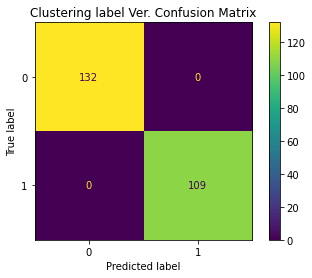

In [133]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt


label=['0', '1'] 
plot = plot_confusion_matrix(newtree_clf, # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Clustering label Ver. Confusion Matrix')